
# Plotting Fronts

This uses MetPy to decode text surface analysis bulletins from the Weather Prediction Center.
The features in this bulletin are then plotted on a map, making use of MetPy's various
path effects for matplotlib than can be used to represent a line as a traditional front.


In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

from metpy.cbook import get_test_data
from metpy.io import parse_wpc_surface_bulletin
from metpy.plots import (add_metpy_logo, ColdFront, OccludedFront, StationaryFront,
                         StationPlot, WarmFront)

Define a function that can be used to readily plot a bulletin that has been parsed into a
pandas `DataFrame`. This essentially encapsulates some appropriate plotting methods as well
as the necessary keyword arguments for giving the expected visual appearance for the
features.



In [2]:
def plot_bulletin(ax, data):
    """Plot a dataframe of surface features on a map."""
    # Set some default visual styling
    size = 4
    fontsize = 9
    complete_style = {'HIGH': {'color': 'blue', 'fontsize': fontsize},
                      'LOW': {'color': 'red', 'fontsize': fontsize},
                      'WARM': {'linewidth': 1, 'path_effects': [WarmFront(size=size)]},
                      'COLD': {'linewidth': 1, 'path_effects': [ColdFront(size=size)]},
                      'OCFNT': {'linewidth': 1, 'path_effects': [OccludedFront(size=size)]},
                      'STNRY': {'linewidth': 1, 'path_effects': [StationaryFront(size=size)]},
                      'TROF': {'linewidth': 2, 'linestyle': 'dashed',
                               'edgecolor': 'darkorange'}}

    # Handle H/L points using MetPy's StationPlot class
    for field in ('HIGH', 'LOW'):
        rows = data[data.feature == field]
        x, y = zip(*((pt.x, pt.y) for pt in rows.geometry))
        sp = StationPlot(ax, x, y, transform=ccrs.PlateCarree(), clip_on=True)
        sp.plot_text('C', [field[0]] * len(x), **complete_style[field])
        sp.plot_parameter('S', rows.strength, **complete_style[field])

    # Handle all the boundary types
    for field in ('WARM', 'COLD', 'STNRY', 'OCFNT', 'TROF'):
        rows = data[data.feature == field]
        ax.add_geometries(rows.geometry, crs=ccrs.PlateCarree(), **complete_style[field],
                          facecolor='none')

Set up the map for plotting, parse the bulletin, and plot it



HTTPError: 503 Server Error: first byte timeout for url: https://raw.githubusercontent.com/Unidata/MetPy/v1.5.1/staticdata/WPC_sfc_fronts_20210628_1800.txt

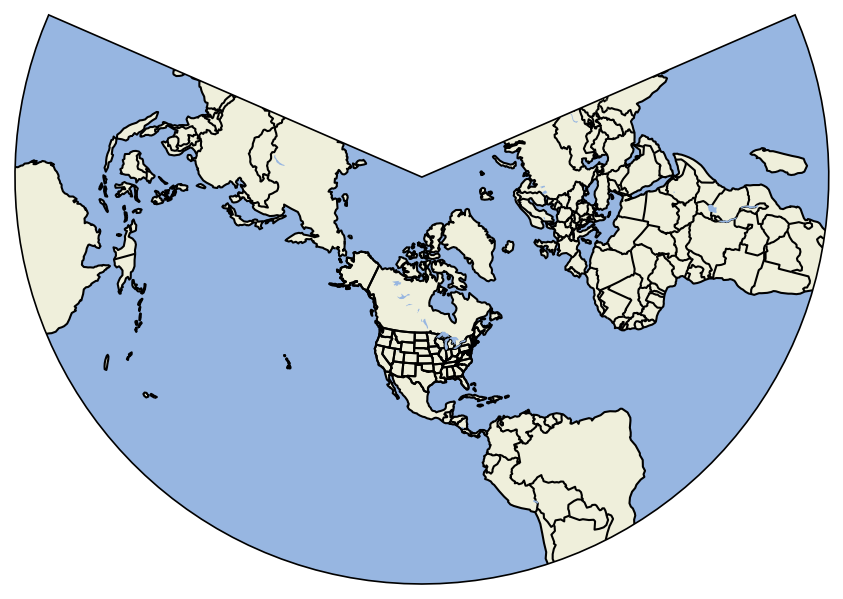

In [3]:
# Set up a default figure and map
fig = plt.figure(figsize=(7, 7), dpi=150)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=-100))
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAKES)

# Parse the bulletin and plot it
df = parse_wpc_surface_bulletin(get_test_data('WPC_sfc_fronts_20210628_1800.txt'))
plot_bulletin(ax, df)

ax.set_title(f'WPC Surface Analysis Valid {df.valid.dt.strftime("%HZ %d %b %Y")[0]}')
add_metpy_logo(fig, 275, 295, size='large')
plt.show()